In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [7]:
nifty_data = yf.download("^NSEI", start="2000-01-01", end="2025-01-01", interval="1d")

nifty_data['Year'] = nifty_data.index.year
yearly_data = nifty_data.groupby('Year')['Close'].last()
yearly_returns = yearly_data.pct_change() * 100  # Convert to percentage

[*********************100%***********************]  1 of 1 completed


In [8]:
mean_return = yearly_returns.mean()
std_dev = yearly_returns.std()
upper_band = mean_return + std_dev
lower_band = mean_return - std_dev

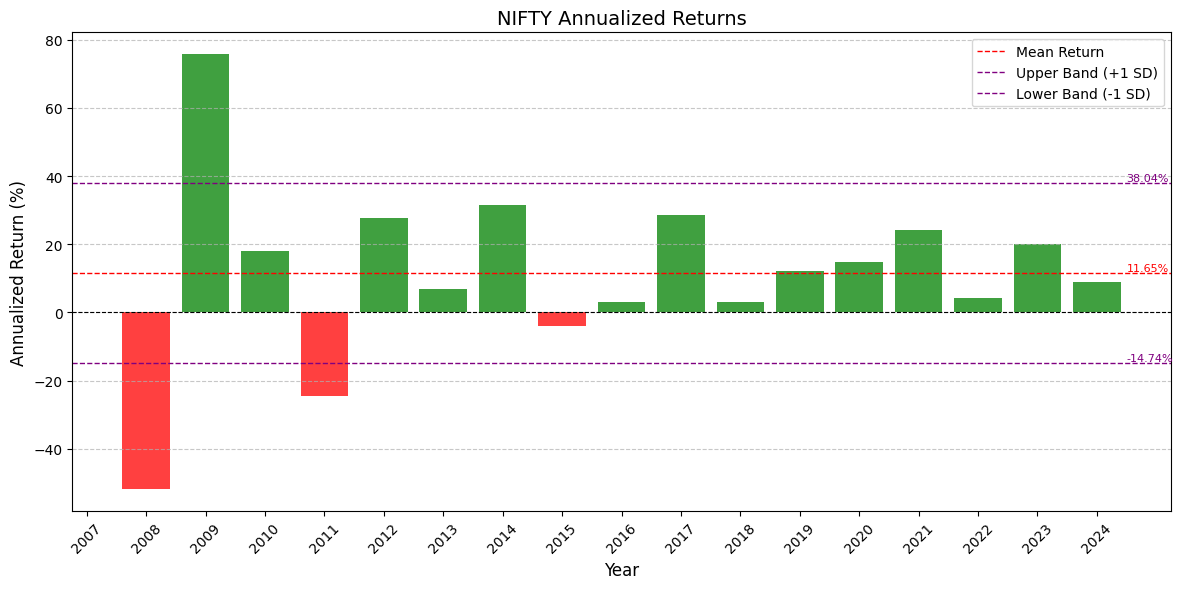

In [9]:
plt.figure(figsize=(12, 6))
colors = ['green' if ret > 0 else 'red' for ret in yearly_returns]


plt.bar(yearly_returns.index, yearly_returns, color=colors, alpha=0.75)

plt.axhline(mean_return, color='red', linewidth=1.0, linestyle='--', label='Mean Return')
plt.axhline(upper_band, color='purple', linewidth=1.0, linestyle='--', label='Upper Band (+1 SD)')
plt.axhline(lower_band, color='purple', linewidth=1.0, linestyle='--', label='Lower Band (-1 SD)')


plt.annotate(f'{mean_return:.2f}%', xy=(yearly_returns.index[-1] + 0.5, mean_return), 
             color='red', fontsize=8, verticalalignment='bottom')
plt.annotate(f'{upper_band:.2f}%', xy=(yearly_returns.index[-1] + 0.5, upper_band), 
             color='purple', fontsize=8, verticalalignment='bottom')
plt.annotate(f'{lower_band:.2f}%', xy=(yearly_returns.index[-1] + 0.5, lower_band), 
             color='purple', fontsize=8, verticalalignment='bottom')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title("NIFTY Annualized Returns", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Annualized Return (%)", fontsize=12)
plt.xticks(yearly_returns.index, rotation=45)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()